In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("Scoping_review_text-analysis_extraction.xlsx", sheet_name="Harmonized Information Included")

In [292]:
df = df.iloc[1:]

In [293]:
df.head()

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,Domain of automated approach,Target database/ type of data,Hosted Application for End-users,Alternative Approach,LLM Model,Models/Resources used with LLM,System Architecture/ Flow,Programming language,Library/Framework,Library/Framework Harmonized,Reported performance metrics,Reported performance metrics Harmonized,Source code availability,Source code link,Data used availability,Preprocessing applied,Pretraining corpus origin,Pretraining corpus size,Fine-tuning corpus data/task,New dataset developed,Fine-tuning corpus size,Number of tasks/datasets for performance evaluation,Hardware used for training/validation/fine-tuning,Hardware type,Internal validity 1,Internal validity 2,External validity,External validity.1,Comment,abstract
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.0258623,Text mining-based word representations for bio...,PLoS ONE [Electronic Resource],2021,BVI,1,NaN,Information Extraction,Embedding representations for bio knowledge/Ge...,"PubMed abstracts, GEO genomics data",yes: https://ebiomecon.genexplain.com/,NaN,BioBERT,Graph-CNN based on Human Protein Reference Dat...,BERT architecture,python,PyTorch,PyTorch,"AUC, Accuracy, F1, similarity threshold","AUC, Accuracy, F1-Score, Similarity Threshold",no,NaN,NaN,for word2vec training: The first phase applied...,for word2vec PubMed FTP repository,"16,558,093 article abstracts",Microarray data sets on breast cancer measured...,yes,10 microarray datasets measured on Affymetrix ...,"4 (lung cancer, liver cancer, prostate cancer,...",Not reported,NaN,Yes,No,yes,word2vec,NaN,Biomedical and life science literature is an e...
2,"Ambalavanan, A. K. and Devarakonda, M. V.",10.1016/j.jbi.2020.103578,https://doi.org/10.1016/j.jbi.2020.103578,Using the contextual language model BERT for m...,Journal of Biomedical Informatics,2020,BVI,1,NaN,Text Classification,Evidence-Based Medicine: Screening scientific ...,MEDLINE abstracts (Clinical Hedges),no,NaN,SciBERT,feed forward network (FFN) as the text classif...,BERT architecture,python,PyTorch,PyTorch,"Precision, Recall, F1","Precision, Recall, F1-Score",yes,https://github.com/md-labs/Clinical_Hedges_BERT,yes,Not reported,see SciBERT,see SciBERT,Clinical Hedges Dataset,no,"50,590 entries",NaN,GPU,GPU,Yes,No,yes,"CNN, Customized text query",Clinical Hedges dataset could be relevant for ...,BACKGROUND: Finding specific scientific articl...
3,"Asada, M. and Miwa, M. and Sasaki, Y.",10.1093/bioinformatics/btac754,https://doi.org/10.1093/bioinformatics/btac754,Integrating heterogeneous knowledge graphs int...,Bioinformatics,2023,BVI,1,NaN,Relation Extraction,Pharma/ Drug-Drug Interaction: Drug-drug inter...,DrugBank database and MEDLINE abstracts,no,NaN,"BERT, ChemBERT, PubMedBERT",Heterogeneous knowledge graphs,BERT architecture,python,HuggingFace,HuggingFace,"Mean reciprokal rank, hits@1, 3, and 10, F1, p...","Mean Reciprocal Rank, Hits@1, 3, and 10, F1-Sc...",yes,https://github.com/tticoin/HKG-DDIE.git,yes,Yes,see BERT models,see BERT models,DDIExtraction-2013 Shared Task; the BioCreativ...,no,20988 records (re-check),NaN,Not reported,NaN,Yes,No,yes,"CNN, Bi-LSTM, SciFice-Large",NaN,MOTIVATION: Most of the conventional deep neur...
4,"Aum, S. and Choe, S.",10.1186/s13643-021-01763-w,https://doi.org/10.1186/s13643-021-01763-w,srBERT: automatic article classification model...,Systematic Reviews,2021,BVI,1,NaN,Text Classification,Evidence-Based Medicine: Screening scientific ...,not clear,no,NaN,BERT,NaN,BERT architecture,Not reported,NaN,NaN,"AUC, Accuracy, Precision, Recall, F1, Loss","AUC, Accuracy, Precision, Recall, F1-Score, Loss",yes,https://github.com/SEONCHOE/,NaN,Not reported,Datasets collected during previous systematic ...,NaN,Two datasets of articles/case studies that had...,no,DatasetA comprises 3268 articles retrieved for...,2,eight NVIDIA V100

# Explorative

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
category_counts

2022    34
2021    27
2020    12
2023    10
2019     5
Name: year, dtype: int64

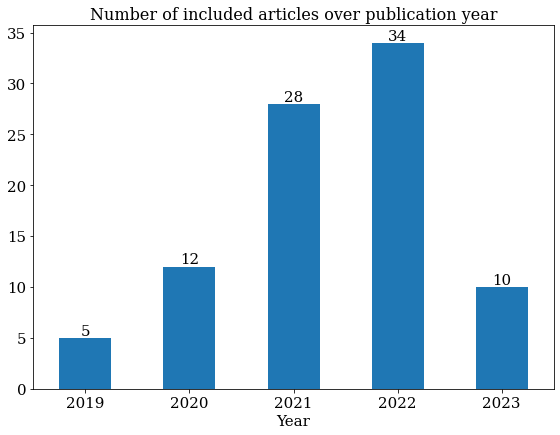

In [259]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a categorical column named 'year'

# Count the frequency of each category and sort by year
category_counts = df['year'].value_counts().sort_index()

# Create a larger figure
plt.figure(figsize=(10, 8))

# Create a vertical bar chart
bar_plot = category_counts.plot.bar()

# Add count values as annotations
for i, v in enumerate(category_counts):
    bar_plot.text(i, v, str(v), color='black', ha='center', va='bottom', fontsize=15)

plt.tight_layout(pad=9)

# Set the x-tick labels to the values from each year category
plt.xticks(range(len(category_counts)), category_counts.index, fontsize=15, rotation=360)
plt.tick_params(axis='y', labelsize=15)  # Adjust the font size of the y-axis tick labels


# Add labels and title with increased font size
plt.xlabel('Year', fontsize=15)
plt.title('Number of included articles over publication year', fontsize=16)

plt.savefig('Visuals/years_count.png')
# Display the chart
plt.show()



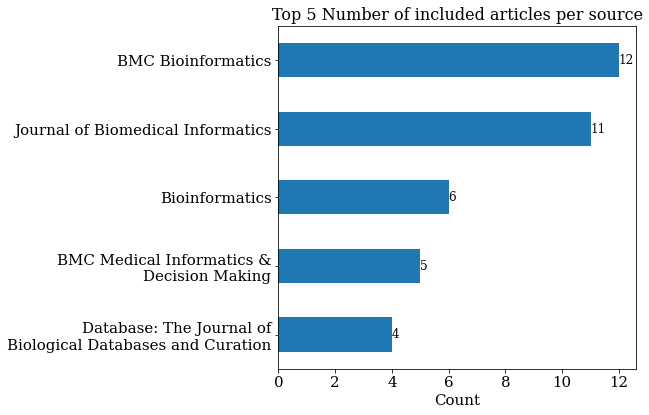

In [258]:
# Count the frequency of each category
category_counts = df['journal']

# Modify the value with "\n" added
category_counts = category_counts.replace("Database: The Journal of Biological Databases and Curation", "Database: The Journal of\nBiological Databases and Curation")
category_counts = category_counts.replace("BMC Medical Informatics & Decision Making", "BMC Medical Informatics &\nDecision Making")

# Get the top 10 categories
top_10_categories = category_counts.value_counts().head(5)

# Sort the categories in descending order
top_10_categories = top_10_categories.sort_values(ascending=True)

# Transpose the DataFrame
top_10_categories = top_10_categories.transpose()

# Create a larger figure
plt.figure(figsize=(10, 8))

# Create a vertical bar chart
bar_plot = top_10_categories.plot.barh()

# Add labels and title
plt.xlabel('Count', fontsize=15)
plt.title('Top 5 Number of included articles per source', fontsize=16)

# Add count values as annotations
for i, v in enumerate(top_10_categories):
    bar_plot.text(v, i, str(v), color='black', va='center', fontsize=12)

# Adjust the layout to fit the labels
plt.tight_layout(pad=9)

# Rotate the y-axis labels
plt.yticks(rotation=0)

plt.tick_params(axis='y', labelsize=15)  # Adjust the font size of the y-axis tick labels
plt.tick_params(axis='x', labelsize=15)  # Adjust the font size of the y-axis tick labels


# Save the plot to a local folder
plt.savefig('Visuals/top_5_journals_count.png')

# Display the chart
plt.show()


In [252]:
top_10_categories

Database: The Journal of Biological Databases and Curation     4
BMC Medical Informatics & Decision Making                      5
Bioinformatics                                                 6
Journal of Biomedical Informatics                             11
BMC Bioinformatics                                            12
Name: journal, dtype: int64

In [287]:
df[['Biomedical Domain', 'Domain Details']] = df['Domain of automated approach'].str.split(':', 1, expand=True)
df[['Biomedical Domain Main', 'Biomedical Domain Additional']] = df['Biomedical Domain'].str.split('/', 1, expand=True)
df[['Biomedical Domain Main']]

,Biomedical Domain Main
0,Literature Screening
1,Embedding representations for bio knowledge
2,Evidence-Based Medicine
3,Pharma
4,Evidence-Based Medicine
5,Embedding representations for bio knowledge
6,General biomedical text mining
7,Literature Screening
8,Literature-Based Discovery
9,Literature-Based Discovery


In [197]:
import textwrap


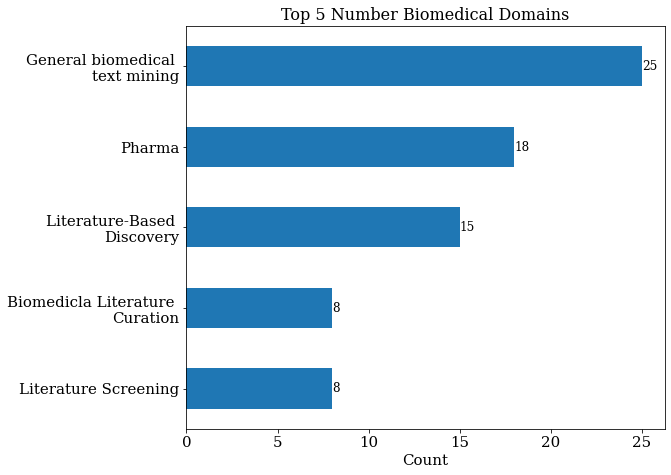

In [290]:
# Count the frequency of each category
df['Biomedical Domain Main'] = df['Biomedical Domain Main'].replace("General biomedical text mining", "General biomedical \ntext mining")
df['Biomedical Domain Main'] = df['Biomedical Domain Main'].replace("Biomedicla Literature Curation", "Biomedicla Literature \nCuration")
df['Biomedical Domain Main'] = df['Biomedical Domain Main'].replace("Literature-Based Discovery", "Literature-Based \nDiscovery")

category_counts = df['Biomedical Domain Main'].value_counts()

# Get the top 10 categories
top_10_categories = category_counts.head(5)

# Sort the categories in descending order
top_10_categories = top_10_categories.sort_values(ascending=True)

# Transpose the DataFrame
top_10_categories = top_10_categories.transpose()

# Create a larger figure
plt.figure(figsize=(10, 8))

# Create a vertical bar chart
bar_plot = top_10_categories.plot.barh()

# Add labels and title
plt.xlabel('Count', fontsize=15)
#plt.ylabel('Category', fontsize=15)
plt.title('Top 5 Number Biomedical Domains', fontsize=16)

# Add count values as annotations with labels on multiple lines
for i, v in enumerate(top_10_categories):
    # Split the label text and insert line breaks
    label_lines = str(v).split(' / ')
    wrapped_labels = '\n'.join(label_lines)
    bar_plot.text(v, i, wrapped_labels, color='black', va='center', fontsize=12)

# Adjust the layout to fit the labels
plt.tight_layout(pad=6)

# Rotate the y-axis labels
#plt.yticks(rotation=0)

plt.tick_params(axis='y', labelsize=15)  # Adjust the font size of the y-axis tick labels
plt.tick_params(axis='x', labelsize=15)  # Adjust the font size of the x-axis tick labels

# Save the plot to a local folder with increased DPI
plt.savefig('Visuals/top_5_biomed_domain_count.png')

# Display the chart
plt.show()


In [227]:
category_counts

General biomedical text mining                 25
Pharma                                         18
Literature-Based Discovery                     15
Literature Screening                            8
Biomedicla Literature Curation                  8
Evidence-Based Medicine                         4
Clinical                                        3
Embedding representations for bio knowledge     2
Biological Functions                            1
Precision Medicine                              1
Pathogen Characterisation                       1
Social Media for Health Care                    1
Literature Recommender System                   1
Anonymization                                   1
Name: Biomedical Domain Main, dtype: int64

In [274]:
#df['Target database/ type of data'] = df['Target database/ type of data'].replace("PubMed Central (PMC) full-text articles", "PubMed Central (PMC)\nfull-text articles")

# Create a new column to store the flattened data types
df['Flattened_Data_Types'] = df['Target database/ type of data'].str.split(', ')

# Explode the flattened data types into separate rows
df_exploded = df.explode('Flattened_Data_Types')
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("PubMed Central (PMC) full-text articles", "PubMed Central (PMC)\nfull-text articles")

# Count the frequency of each data type
data_type_counts = df_exploded['Flattened_Data_Types'].value_counts()

# Print the frequency counts
# Adjust the maximum display options to show the full list
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the full list of data type counts
print(data_type_counts)

PubMed abstracts                                                                                     45
PubMed Central (PMC)\nfull-text articles                                                             15
COVID-19 Literature                                                                                   9
MEDLINE                                                                                               5
EMBASE                                                                                                2
Structured Product Labels (SPL)                                                                       2
Twitter                                                                                               2
Discharge summaries and cancer pathology reports                                                      2
DrugBank database and MEDLINE abstracts                                                               2
PLoS One                                                        

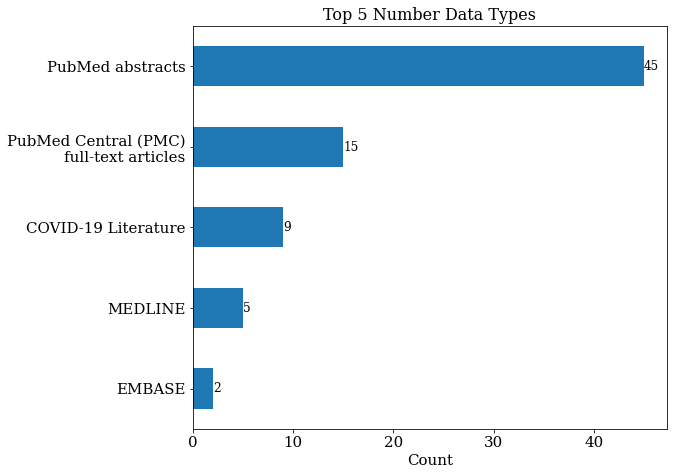

In [279]:
# Get the top 10 categories
top_10_categories = data_type_counts.head(5)

# Sort the categories in descending order
top_10_categories = top_10_categories.sort_values(ascending=True)

# Transpose the DataFrame
top_10_categories = top_10_categories.transpose()

# Create a larger figure
plt.figure(figsize=(10, 8))

# Create a vertical bar chart
bar_plot = top_10_categories.plot.barh()

# Add labels and title
plt.xlabel('Count', fontsize=15)
plt.title('Top 5 Number Data Types', fontsize=16)

# Add count values as annotations
for i, v in enumerate(top_10_categories):
    bar_plot.text(v, i, str(v), color='black', va='center', fontsize=12)

# Adjust the layout to fit the labels
plt.tight_layout(pad=6)

# Rotate the y-axis labels
plt.yticks(rotation=0)

plt.tick_params(axis='y', labelsize=15)  # Adjust the font size of the y-axis tick labels
plt.tick_params(axis='x', labelsize=15)  # Adjust the font size of the y-axis tick labels

# Save the plot to a local folder
plt.savefig('Visuals/top_5_datatype_count.png')

# Display the chart
plt.show()

In [281]:
# Create a new column to store the flattened data types
df['Flattened_Models'] = df['LLM Model'].str.split(', ')

# Explode the flattened data types into separate rows
df_exploded = df.explode('Flattened_Models')

# Count the frequency of each data type
data_type_counts = df_exploded['Flattened_Models'].value_counts()

# Print the frequency counts
# Adjust the maximum display options to show the full list
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the full list of data type counts
print(data_type_counts)

BioBERT                         51
BERT                            33
PubMedBERT                      17
SciBERT                         14
BlueBERT                        12
ClinicalBERT                     5
RoBERTa                          3
BioClinicalBERT                  2
BERN                             2
Bioformer                        2
DistilBERT                       2
BioELECTRA                       1
Sultan                           1
BioALBERT                        1
Sentence-BERT                    1
Longformer                       1
AlBERT                           1
UMLSBERT                         1
Bio+ClinicalBERT                 1
BioGPT                           1
COVID-Twitter-BERT               1
BERTfilter                       1
T5                               1
R-BERT                           1
NCBI BERT                        1
Relation BioBERT (R-BioBERT)     1
FARM-BERT                        1
BioBERT (base and large)         1
SPECTER             

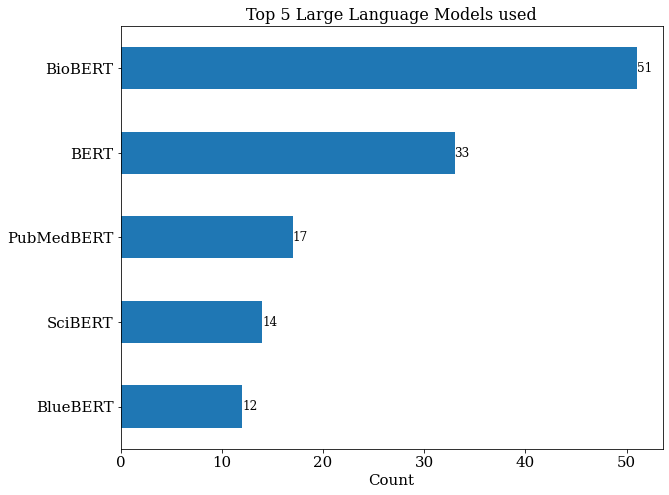

In [283]:
# Get the top 10 categories
top_10_categories = data_type_counts.head(5)

# Sort the categories in descending order
top_10_categories = top_10_categories.sort_values(ascending=True)

# Transpose the DataFrame
top_10_categories = top_10_categories.transpose()

# Create a larger figure
plt.figure(figsize=(10, 8))

# Create a vertical bar chart
bar_plot = top_10_categories.plot.barh()

# Add labels and title
plt.xlabel('Count', fontsize=15)
plt.title('Top 5 Large Language Models used', fontsize=16)

# Add count values as annotations
for i, v in enumerate(top_10_categories):
    bar_plot.text(v, i, str(v), color='black', va='center', fontsize=12)

# Adjust the layout to fit the labels
plt.tight_layout(pad=5)

# Rotate the y-axis labels
#plt.yticks(rotation=0)

plt.tick_params(axis='y', labelsize=15)  # Adjust the font size of the y-axis tick labels
plt.tick_params(axis='x', labelsize=15)  # Adjust the font size of the y-axis tick labels


# Save the plot to a local folder
plt.savefig('Visuals/top_5_llm_models_count.png')

# Display the chart
plt.show()

In [232]:
top_10_categories

BlueBERT      12
SciBERT       14
PubMedBERT    17
BERT          33
BioBERT       51
Name: Flattened_Models, dtype: int64

## Sanky Diagram

In [7]:
%pip install pySankey


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install webcolors


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:

import pandas as pd
import numpy as np
from webcolors import hex_to_rgb
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)  


In [10]:
df_sanky = pd.read_csv("domain_application_count.csv") # comes from PowerBI

In [11]:
df_sanky

,Title domain of automated approach.1,Target application,Sum of Included
0,Pharma,Relation Extraction,12
1,General biomedical text mining,Named Entity Recognition,7
2,Biomedicla Literature Curation,Text Classification,7
3,Literature Screening,Information Retrieval,6
4,General biomedical text mining,Multi-Domain,6
5,General biomedical text mining,Entity Normalization/Linking,5
6,Literature-Based Discovery,Information Retrieval,4
7,General biomedical text mining,Relation Extraction,4
8,Literature-Based Discovery,Knowledge Graph,3
9,Pharma,Text Classification,3


In [12]:
l1 = df_sanky["Title domain of automated approach.1"].to_list()
l2 = df_sanky["Target application"].to_list()
connect_values = df_sanky["Sum of Included"].to_list()

In [13]:
levels_combined = list(set(l1+l2))
levels_combined

['Clinical',
 'Biomedicla Literature Curation',
 'Question Answering',
 'Evidence-Based Medicine',
 'Literature-Based Discovery',
 'Entity Normalization/Linking',
 'Social Media for Health Care',
 'General biomedical text mining',
 'Pharma',
 'Literature Recommender System',
 'Literature Screening',
 'Information Retrieval',
 'Named Entity Recognition',
 'Anonymization',
 'Knowledge Graph',
 'Information Extraction',
 'Relation Extraction',
 'Pathogen Characterisation',
 'Biological Functions',
 'Machine Reading Coprehension',
 'Text Classification',
 'Text Summarization',
 'Other',
 'Embedding representations for bio knowledge',
 'Similarity Clustering',
 'Multi-Domain',
 'Precision Medicine',
 'COVID-19 Literature']

In [14]:
node_label = ["A1", "A2", "B1", "B2","B3", "C1", "C2"]
node_dict = {y:x for x, y in enumerate(levels_combined)}
node_dict

{'Clinical': 0,
 'Biomedicla Literature Curation': 1,
 'Question Answering': 2,
 'Evidence-Based Medicine': 3,
 'Literature-Based Discovery': 4,
 'Entity Normalization/Linking': 5,
 'Social Media for Health Care': 6,
 'General biomedical text mining': 7,
 'Pharma': 8,
 'Literature Recommender System': 9,
 'Literature Screening': 10,
 'Information Retrieval': 11,
 'Named Entity Recognition': 12,
 'Anonymization': 13,
 'Knowledge Graph': 14,
 'Information Extraction': 15,
 'Relation Extraction': 16,
 'Pathogen Characterisation': 17,
 'Biological Functions': 18,
 'Machine Reading Coprehension': 19,
 'Text Classification': 20,
 'Text Summarization': 21,
 'Other': 22,
 'Embedding representations for bio knowledge': 23,
 'Similarity Clustering': 24,
 'Multi-Domain': 25,
 'Precision Medicine': 26,
 'COVID-19 Literature': 27}

In [15]:
source = l1 #['A1','A1','A1','A2','A2','A2','B1','B2','B2','B3','B3']
target = l2 #['B1','B2','B3','B1','B2','B3','C1','C1','C2','C1','C2'] 
values = connect_values #[ 10, 5, 15, 5, 20, 45, 15, 20, 5, 30, 30 ]

In [16]:
source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]

In [17]:
#source_node

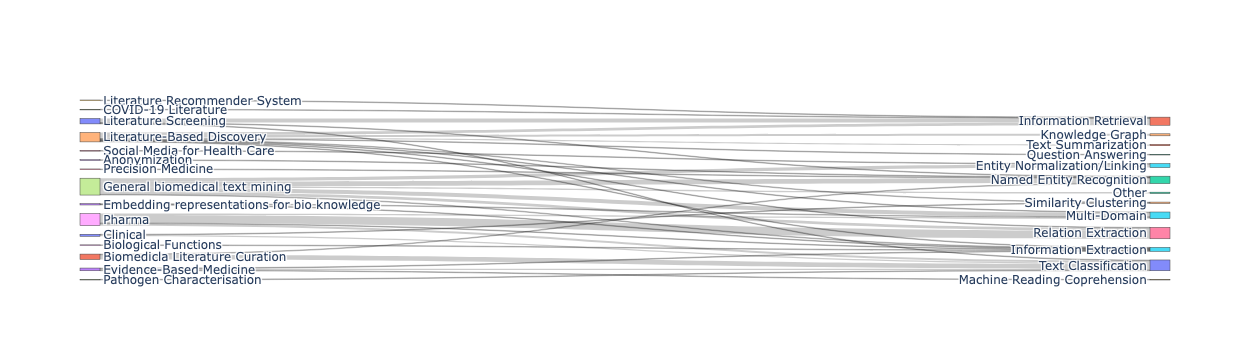

In [21]:
import plotly.graph_objects as go # Import the graphical object

fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            label = levels_combined
        ),
        # This part is for the link information
        link = dict(
            source = source_node,
            target = target_node,
            value = values
        ))])

# With this save the plots 
plot(fig,
     image_filename='sankey_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=600
)
# And shows the plot
fig.show()

# Abstracts Clustering

In [3]:
!pip install wordcloud

In [4]:
df = pd.read_excel("Scoping_review_text-analysis_extraction.xlsx", sheet_name="Harmonized Information Included")

In [324]:
df.head()

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,Domain of automated approach,Target database/ type of data,Hosted Application for End-users,Alternative Approach,LLM Model,Models/Resources used with LLM,System Architecture/ Flow,Programming language,Library/Framework,Library/Framework Harmonized,Reported performance metrics,Reported performance metrics Harmonized,Source code availability,Source code link,Data used availability,Preprocessing applied,Pretraining corpus origin,Pretraining corpus size,Fine-tuning corpus data/task,New dataset developed,Fine-tuning corpus size,Number of tasks/datasets for performance evaluation,Hardware used for training/validation/fine-tuning,Hardware type,Internal validity 1,Internal validity 2,External validity,External validity.1,Comment,abstract,Preprocessed_Abstract
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.0258623,Text mining-based word representations for bio...,PLoS ONE [Electronic Resource],2021,BVI,1,NaN,Information Extraction,Embedding representations for bio knowledge/Ge...,"PubMed abstracts, GEO genomics data",yes: https://ebiomecon.genexplain.com/,NaN,BioBERT,Graph-CNN based on Human Protein Reference Dat...,BERT architecture,python,PyTorch,PyTorch,"AUC, Accuracy, F1, similarity threshold","AUC, Accuracy, F1-Score, Similarity Threshold",no,NaN,NaN,for word2vec training: The first phase applied...,for word2vec PubMed FTP repository,"16,558,093 article abstracts",Microarray data sets on breast cancer measured...,yes,10 microarray datasets measured on Affymetrix ...,"4 (lung cancer, liver cancer, prostate cancer,...",Not reported,NaN,Yes,No,yes,word2vec,NaN,Biomedical and life science literature is an e...,biomedical life science literature essential w...
2,"Ambalavanan, A. K. and Devarakonda, M. V.",10.1016/j.jbi.2020.103578,https://doi.org/10.1016/j.jbi.2020.103578,Using the contextual language model BERT for m...,Journal of Biomedical Informatics,2020,BVI,1,NaN,Text Classification,Evidence-Based Medicine: Screening scientific ...,MEDLINE abstracts (Clinical Hedges),no,NaN,SciBERT,feed forward network (FFN) as the text classif...,BERT architecture,python,PyTorch,PyTorch,"Precision, Recall, F1","Precision, Recall, F1-Score",yes,https://github.com/md-labs/Clinical_Hedges_BERT,yes,Not reported,see SciBERT,see SciBERT,Clinical Hedges Dataset,no,"50,590 entries",NaN,GPU,GPU,Yes,No,yes,"CNN, Customized text query",Clinical Hedges dataset could be relevant for ...,BACKGROUND: Finding specific scientific articl...,background finding specific scientific article...
3,"Asada, M. and Miwa, M. and Sasaki, Y.",10.1093/bioinformatics/btac754,https://doi.org/10.1093/bioinformatics/btac754,Integrating heterogeneous knowledge graphs int...,Bioinformatics,2023,BVI,1,NaN,Relation Extraction,Pharma/ Drug-Drug Interaction: Drug-drug inter...,DrugBank database and MEDLINE abstracts,no,NaN,"BERT, ChemBERT, PubMedBERT",Heterogeneous knowledge graphs,BERT architecture,python,HuggingFace,HuggingFace,"Mean reciprokal rank, hits@1, 3, and 10, F1, p...","Mean Reciprocal Rank, Hits@1, 3, and 10, F1-Sc...",yes,https://github.com/tticoin/HKG-DDIE.git,yes,Yes,see BERT models,see BERT models,DDIExtraction-2013 Shared Task; the BioCreativ...,no,20988 records (re-check),NaN,Not reported,NaN,Yes,No,yes,"CNN, Bi-LSTM, SciFice-Large",NaN,MOTIVATION: Most of the conventional deep neur...,motivation conventional deep neural network ba...
4,"Aum, S. and Choe, S.",10.1186/s13643-021-01763-w,https://doi.org/10.1186/s13643-021-01763-w,srBERT: automatic article classification model...,Systematic Reviews,2021,BVI,1,NaN,Text Classification,Evidence-Based Medicine: Screening scientific ...,not clear,no,NaN,BERT,NaN,BERT architecture,Not reported,NaN,NaN,"AUC, Accuracy, Precision, Recall, F1, Loss","AUC, Accuracy, Precision, Recall, F1-Score, Loss",yes,https://github.com/SEONCHOE/,NaN,Not reported,Data

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/donevas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/donevas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Users/donevas/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


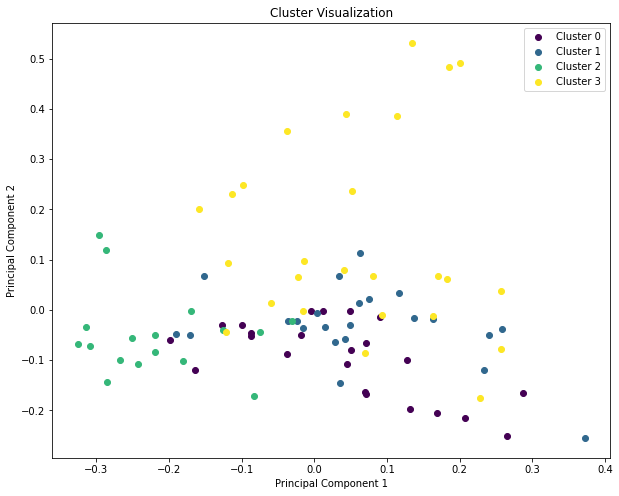

In [5]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 2: Preprocess the abstracts (tokenization, lowercase, stop words removal, etc.)
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove non-alphanumeric characters
    text = re.sub(r'\W+', ' ', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lowercase conversion
    tokens = [token.lower() for token in tokens]
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Remove the word 'model'
    #tokens = [token for token in tokens if token != 'model']
    #tokens = [token for token in tokens if token != 'method']
    #tokens = [token for token in tokens if token != 'task']

    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

df['Preprocessed_Abstract'] = df['abstract'].apply(preprocess_text)

# Step 3: Vectorize the abstracts
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Preprocessed_Abstract'])

# Step 4: Choose a clustering algorithm (K-means in this example)
num_clusters = 4  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Step 5: Apply the clustering algorithm
# List of cluster labels
cluster_labels = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# List of unique cluster labels
unique_clusters = np.unique(cluster_labels)

# List of colors for each cluster label
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

# Create a larger figure
plt.figure(figsize=(10, 8))

# Scatter plot of PCA-transformed data points with cluster labels as colors
for cluster_label, color in zip(unique_clusters, colors):
    mask = cluster_labels == cluster_label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], color=color, label=f'Cluster {cluster_label}')

plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('Visuals/cluster_vis_tfidf_pca.png')  # Change the format and resolution as needed
plt.show()


In [143]:
cluster_counts = pd.Series(cluster_labels).value_counts()

# Print the number of documents in each cluster
for i, count in cluster_counts.items():
    print(f"Cluster {i}: {count} documents")

Cluster 0: 39 documents
Cluster 3: 19 documents
Cluster 1: 16 documents
Cluster 2: 15 documents


### dynamic exploration

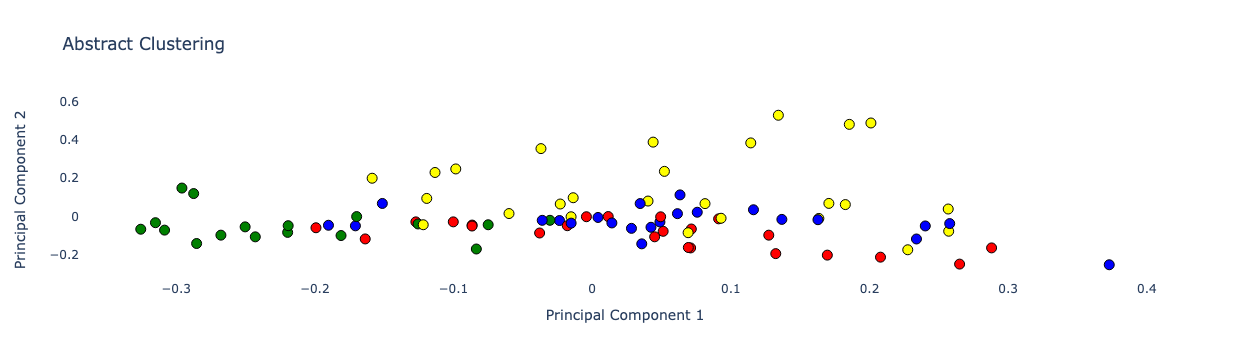

In [22]:
df['Cluster'] = cluster_labels

import plotly.graph_objects as go # Import the graphical object
import plotly.colors as colors


# Define custom colors for each cluster label
cluster_colors = ['red', 'blue', 'green', 'yellow', 'orange']

fig = go.Figure(data=go.Scatter(
    x=X_pca[:, 0], y=X_pca[:, 1],
    mode='markers',
    marker=dict(
        color=[cluster_colors[label] for label in cluster_labels],
        size=10,  # Adjust the marker size here
        line=dict(width=1, color='Black')
    ),
    hovertemplate='<b>Title:</b> %{text}',
    text=df['title']
))


# Set plot title and axis labels
fig.update_layout(
    title='Abstract Clustering',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    plot_bgcolor='white'  # Set the background color to white
)

plot(fig,
     image_filename='abstracts_cluster_bert_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=800
)

# Show the plot
fig.show()



In [157]:
import plotly.graph_objects as go

# Define custom colors for each cluster label
cluster_colors = ['red', 'blue', 'green', 'orange', 'orange']

# Define cluster names (you can customize this based on your requirement)
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

fig = go.Figure()

# Add scatter plot for data points
fig.add_trace(go.Scatter(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    mode='markers',
    marker=dict(
        color=[cluster_colors[label] for label in cluster_labels],
        size=10,  # Adjust the marker size here
        line=dict(width=1, color='Black')
    ),
    hovertemplate='<b>Title:</b> %{text}',
    text=df['title'],
    showlegend=False  # Hide the legend for data points
))

# Add text annotations for cluster names
for i, name in enumerate(cluster_names):
    cluster_x = X_pca[cluster_labels == i, 0].mean()  # Calculate mean x position for the cluster
    cluster_y = X_pca[cluster_labels == i, 1].mean()  # Calculate mean y position for the cluster
    fig.add_trace(go.Scatter(
        x=[cluster_x],
        y=[cluster_y],
        mode='text',
        text=[name],
        showlegend=False,
        textposition='bottom center',
        textfont=dict(size=18, color=cluster_colors[i])  # Set the text font size to 18 (you can adjust this value)
    ))

# Set plot title and axis labels
fig.update_layout(
    title='Abstract Clustering',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    plot_bgcolor='white'  # Set the background color to white
)

plot(fig,
     image_filename='abstracts_cluster_bert_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=600
)

# Show the plot
fig.show()


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


### word clouds

In [152]:
from wordcloud import WordCloud

In [91]:
term_frequencies[0, tfidf_vectorizer.vocabulary_['model']]

4.040498806970412

In [115]:
# Calculate the sum of TF-IDF scores for each term
term_scores = np.sum(tfidf_matrix, axis=0)

# Get the vocabulary indices for the terms
vocab_indices = np.array(list(tfidf_vectorizer.vocabulary_.values()))

# Sort the terms based on their sum of TF-IDF scores in descending order
sorted_indices = np.argsort(-term_scores[0, vocab_indices])

# Get the top 10 most frequent words
top_10_indices = sorted_indices[0, : 10]
top_10_words = [tfidf_vectorizer.get_feature_names_out()[vocab_indices[i]] for i in top_10_indices]
top_10_words

[array([['biomedical', 'model', 'drug', 'text', 'bert', 'models', 'task',
         'extraction', 'performance', 'literature']], dtype=object)]

In [113]:
sorted_indices

matrix([[   9,  107,  405, ..., 2603, 2585, 2573]])

In [88]:
average_frequency

781.4946129017154

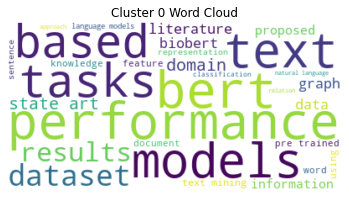

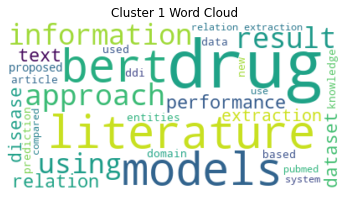

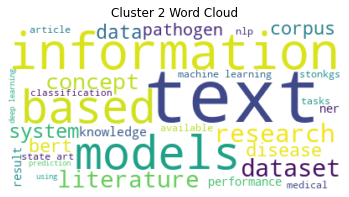

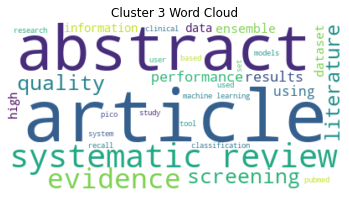

In [154]:
cluster_labels = kmeans.labels_

# Step 8: Calculate term frequencies across all clusters
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Preprocessed_Abstract'])

# Calculate the term frequencies
term_frequencies = np.sum(tfidf_matrix, axis=0)

threshold = 3

words_to_remove = ['method', 'task', 'model', 'methods', 'biomedical']

for i in range(num_clusters):
    cluster_abstracts = df.loc[df['Cluster'] == i, 'Preprocessed_Abstract']
    cluster_text = ' '.join(cluster_abstracts)
    cluster_text = ' '.join(word for word in cluster_text.split() if word not in words_to_remove)

    
    # Generate the word cloud
    wordcloud = WordCloud(background_color='white', max_words=30).generate(cluster_text)
    
    # Apply the term frequency threshold
    word_frequencies = wordcloud.process_text(cluster_text)
    # Apply the term frequency threshold
    filtered_words = [word for word in word_frequencies.keys() if word in tfidf_vectorizer.vocabulary_ and term_frequencies[0, tfidf_vectorizer.vocabulary_[word]] <= threshold]
    #print(filtered_words)
    #wordcloud.words_ = {word: freq for word, freq in word_frequencies.items() if word in filtered_words}
    #print(wordcloud.words_)

    
    # Plot the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {i} Word Cloud')
    plt.savefig('Visuals/word_cloud_cluster_{}.png'.format(i))  # Change the format and resolution as needed
    plt.show()

In [77]:
tfidf_vectorizer.vocabulary_['motivation']

1739

In [78]:
term_frequencies[0, 1739]

0.43660389232414387

In [134]:
# Sort the dictionary items based on their values in descending order
sorted_items = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 dictionary objects (key-value pairs) based on the values
top_10_dict_objects = dict(sorted_items[:10])

print(top_10_dict_objects)

{'models': 28, 'quality': 27, 'systematic review': 26, 'evidence': 22, 'screening': 20, 'article': 20, 'abstract': 19, 'dataset': 18, 'using': 17, 'high': 16}


### using bioBERT embeddings

In [7]:
from transformers import AutoModel, AutoTokenizer

In [39]:
# Step 3: Load BioBERT model and tokenizer
#model_name = "dmis-lab/biobert-base-cased-v1.1"
#model = AutoModel.from_pretrained(model_name)
#tokenizer = AutoTokenizer.from_pretrained(model_name)

# Step 3: Load PubMedBERT model and tokenizer
model_name = "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract"
model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Step 4: Tokenize and encode the texts
encoded_inputs = tokenizer(df['Preprocessed_Abstract'].tolist(), padding=True, truncation=True, return_tensors="pt")

# Step 5: Obtain the embeddings from BioBERT
outputs = model(**encoded_inputs)
embeddings = outputs.last_hidden_state

# Reshape the embeddings to have two dimensions
embeddings_2d = embeddings[:, 0, :].detach().numpy()

# Step 6: Apply the clustering algorithm (K-means in this example)
num_clusters = 4  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(embeddings_2d)

# Step 7: Assign cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_


Some weights of the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no 

In [40]:
cluster_counts = pd.Series(cluster_labels).value_counts()

# Print the number of documents in each cluster
for i, count in cluster_counts.items():
    print(f"Cluster {i}: {count} documents")

Cluster 1: 43 documents
Cluster 3: 19 documents
Cluster 2: 17 documents
Cluster 0: 10 documents


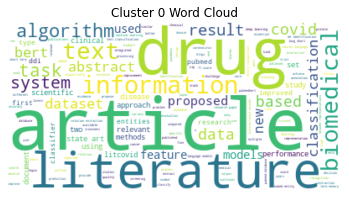

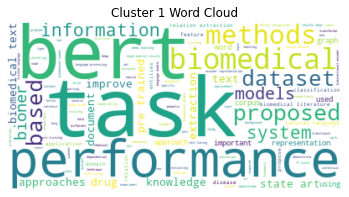

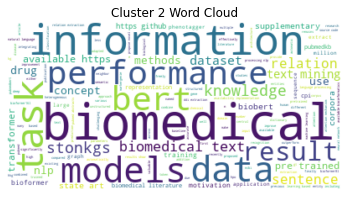

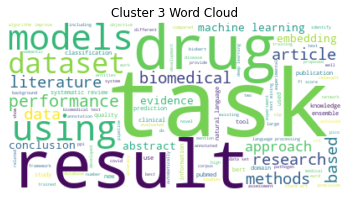

In [41]:
cluster_labels = kmeans.labels_

# Step 6: Generate a word cloud for each cluster
for i in range(num_clusters):
    cluster_abstracts = df.loc[cluster_labels == i, 'Preprocessed_Abstract']
    cluster_text = ' '.join(cluster_abstracts)
    
    # Generate the word cloud
    wordcloud = WordCloud(background_color='white').generate(cluster_text)
    
    # Plot the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {i} Word Cloud')
    plt.show()

In [42]:
pca = PCA(n_components=2, random_state=42)
embeddings_2d_pca = pca.fit_transform(embeddings_2d)

In [48]:
import plotly.graph_objects as go # Import the graphical object
import plotly.colors as colors


# Define custom colors for each cluster label
cluster_colors = ['red', 'blue', 'green', 'yellow', 'orange']

fig = go.Figure()

# Reset the figure
fig.data = []

# Add scatter plots for each cluster
for label in set(cluster_labels):
    cluster_df = df[df['Cluster'] == label]
    fig.add_trace(go.Scatter(
        x=embeddings_2d_pca[cluster_df.index, 0],
        y=embeddings_2d_pca[cluster_df.index, 1],
        mode='markers',
        marker=dict(
            color=cluster_colors[label],
            size=10,  # Adjust the marker size here
            line=dict(width=1, color='Black')
        ),
        hovertemplate='<b>Title:</b> %{text}',
        text=cluster_df['title'],
        name=f'Cluster {label}'
    ))


# Set plot title and axis labels
fig.update_layout(
    title='Abstract Clustering',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    plot_bgcolor='white'  # Set the background color to white
)


# With this save the plots 
plot(fig,
     image_filename='abstracts_cluster_bert_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=600
)
# And shows the plot
fig.show()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [370]:
len(embeddings_2d[0])

768